### 파이썬 머신러닝
## 비지도 학습과 데이터 전처리
---
# 주성분 분석 (PCA)

### 개념
- PCA : Principal Component Analysis
- 기존의 데이터는 속성 하나하나가 좌표축으로 이루어진 다차원 공간에 위치하고 있습니다.
- 속성들은 둘 간에 서로 연관되어 있는데 이를 수치화한 것을 **상관계수(Correlation Coefficient)** 라고 합니다. 이를 확장하여 모든 속성들을 고려했을 때, 가장 전체 데이터를 잘 표현할 수 있는 방향(벡터)를 찾을 수 있을 것입니다.
- 이렇게 모든 속성에서 가장 중요한 방향(**주성분**)을 찾아 나가는 것을 **PCA** 라고 합니다. 다르게 표현하면 전체 데이터에서 **가장 분산이 큰 방향** 을 찾는 것입니다.
- 첫번째 주성분을 찾으면 그것과 직각이 되는 방향 중에서 가장 분산이 큰 성분을 찾습니다. 이렇게 원본 속성 만큼의 주성분을 차례대로 찾아나갈 수 있습니다. (속성이 2개면 주성분은 2개, 3개면 주성분은 3개 등등)

### 기본 예시
- 예를 들기 위해, Iris 데이터를 사용하고 시각화를 위해 속성을 2개로 제한하겠습니다.

In [1]:
# import warnings
# warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

(0.6922751443224965,
 7.207724855677505,
 -0.03959290692065934,
 2.639592906920659)

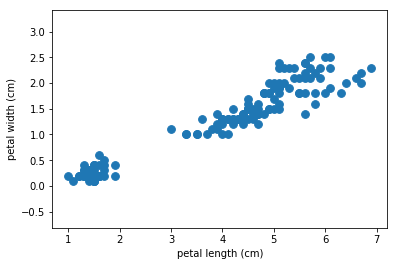

In [3]:
col1 = 2 # petal length
col2 = 3 # petal width

plt.scatter(iris.data[:,col1], iris.data[:,col2], s=60)
plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.axis('equal')

### PCA 로 주성분 찾기
- 주성분, 즉 분산이 가장 큰 방향을 PCA 를 이용해 찾아보겠습니다.

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(iris.data[:,[col1,col2]])

pca.components_

array([[ 0.92154695,  0.38826694],
       [-0.38826694,  0.92154695]])

(-0.7532586930920318,
 7.276559800316291,
 -0.1258905866782118,
 2.6437023202424474)

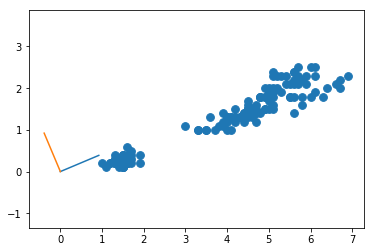

In [5]:
plt.scatter(iris.data[:,col1], iris.data[:,col2], s=60)

plt.plot([0, pca.components_[0,0]], [0, pca.components_[0,1]])
plt.plot([0, pca.components_[1,0]], [0, pca.components_[1,1]])
plt.axis('equal')

In [6]:
# 벡터곱이 0, 즉 두 성분은 직교한다
c = pca.components_
(c[0]*c[1]).sum()

0.0

- 위의 결과에서 pca_componets\_ 를 설명하겠습니다.
- 각 행은 주성분을 나타냅니다. 즉 (0.9, 0.4) 와 (-0.4, 0.9) 두 개입니다. 그리고 (0.9, 0.4) 의 성분은 각각 x축, y축 방향을 나타냅니다.
- 아래에서 주성분을 직선으로 그려보겠습니다.

(-1.160938983653268,
 7.295973147485874,
 -0.1258905866782118,
 2.6437023202424474)

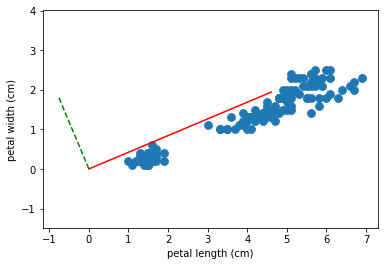

In [7]:
plt.scatter(iris.data[:,col1], iris.data[:,col2], s=60)

scale=5
plt.plot([0,pca.components_[0,0]*scale], [0,pca.components_[0,1]*scale],'r-')

scale=2
plt.plot([0,pca.components_[1,0]*scale], [0,pca.components_[1,1]*scale],'g--')

plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.axis('equal')

- PCA 결과를 다른 식으로 해석하면, 데이터를 가장 잘 표현하는 **새로운 축들로 데이터를 회전변환** 하는 것입니다.
- 아래에서 원본 데이터를 새로운 좌표계로 변환하겠습니다.

In [8]:
X_pca = pca.transform(iris.data[:,[col1,col2]])
X_pca.shape

(150, 2)

In [11]:
iris.data[:5,[col1,col2]]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [12]:
X_pca[:5]

array([[-2.56137133, -0.00452592],
       [-2.56137133, -0.00452592],
       [-2.65352602,  0.03430077],
       [-2.46921663, -0.04335262],
       [-2.56137133, -0.00452592]])

In [15]:
col1=0
col2=2
pca = PCA()
pca.fit(iris.data[:,[col1,col2]])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(-4.595448028673835, 8.504408602150537, -1.4879175486514031, 7.313878550356258)

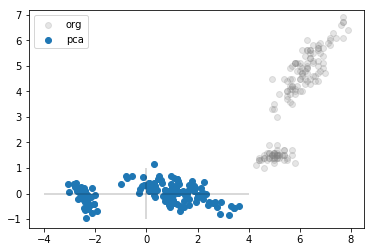

In [16]:
X_pca = pca.transform(iris.data[:,[col1,col2]])
plt.scatter(iris.data[:,col1], iris.data[:,col2], c='gray', alpha=0.2, label='org')

plt.hlines([0],-4,4, alpha=0.2)
plt.vlines([0],-1,1, alpha=0.2)
plt.scatter(X_pca[:,0], X_pca[:,1], label='pca')

plt.legend()
plt.axis('equal')

In [17]:
X_pca.mean(axis=0)

array([3.75995531e-16, 5.34757424e-16])

### 정규화 후 PCA 적용
- PCA 도 SVM 처럼 정규화가 반드시 필요합니다.
- 스케일이 다르면 분산이 달라지기 때문입니다.
- 즉 스케일이 큰 쪽으로 그림이 늘어나기 때문에 스케일이 큰 속성이 주성분이 될 확률이 높아집니다.

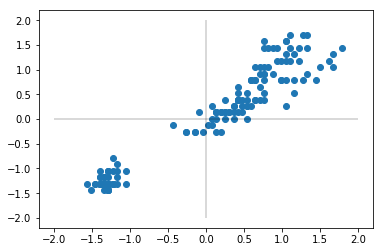

In [11]:
X_norm = iris.data[:,[col1,col2]]
X_norm = (X_norm - X_norm.mean(axis=0)) / X_norm.std(axis=0)

plt.hlines([0], -2, 2, alpha=0.2)
plt.vlines([0], -2, 2, alpha=0.2)
plt.scatter(X_norm[:,0], X_norm[:,1])

In [12]:
pca2 = PCA()
pca2.fit(X_norm)
X_norm_pca = pca2.transform(X_norm)

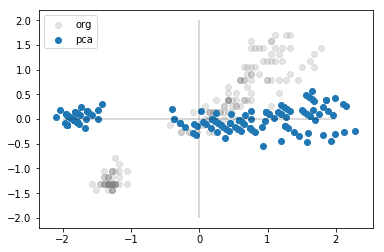

In [13]:
plt.scatter(X_norm[:,0], X_norm[:,1], c='gray', alpha=0.2, label='org')

plt.hlines([0],-2,2, alpha=0.2)
plt.vlines([0],-2,2, alpha=0.2)
plt.scatter(X_norm_pca[:,0], X_norm_pca[:,1], label='pca')

plt.legend()

### 다차원 공간의 PCA (Iris 속성 4개 모두 사용)

In [18]:
pca = PCA()
pca.fit(iris.data)

pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])

In [16]:
# 두 주성분 간의 벡터곱은 항상 0 이다 (두 축은 직교한다)
(pca.components_[0] * pca.components_[2]).sum()

1.1102230246251565e-16

In [17]:
X_pca = pca.transform(iris.data)
display(X_pca.shape, X_pca[:2])

(150, 4)

array([[-2.68420713e+00,  3.26607315e-01, -2.15118370e-02,
         1.00615724e-03],
       [-2.71539062e+00, -1.69556848e-01, -2.03521425e-01,
         9.96024240e-02]])

- X_pca 는 원본 속성을 PCA 로 변환한 4개의 새로운 속성값을 가집니다.
- PCA 는 원본 속성의 속성 갯수를 줄이는 용도로 많이 사용합니다. 
- 앞에 있는 주성분이 중요하므로 앞 쪽에 있는 주성분 2개만 적용해 보겠습니다.

In [14]:
pca = PCA(2) # n_components=2
pca.fit(iris.data)

pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

- 첫번째 주성분은 3번째 속성의 값이 큽니다. 즉, petal length 속성이 중요하게 고려되었습니다.
- 두번째 주성분은 1번째와 2번째 속성의 값이 큽니다. sepal length 와 sepal width 의 역할이 큽니다.

In [15]:
X_pca = pca.transform(iris.data)
display(X_pca.shape, X_pca[:2])

(150, 2)

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685]])

- 원본 속성이 4개인데 주성분을 2개로 해서 변환한다는 것은, 4차원 데이터를 2차원으로 차원을 줄인 효과를 가집니다. (다르게는 가장 중요한 속성 2가지로 요약했다는 의미입니다.)
- 속성이 2개로 줄었으므로, 2차원 그래프를 그릴 수 있습니다.

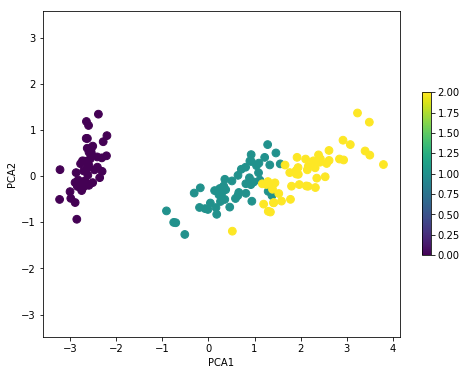

In [16]:
plt.figure(figsize=[8,6])
plt.scatter(X_pca[:,0], X_pca[:,1], c=iris.target, s=60)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.axis('equal')
plt.colorbar(shrink=0.5)

- 원본 속성과의 비교를 위해 petal length 와 sepal length 의 산점도를 그려보겠습니다.

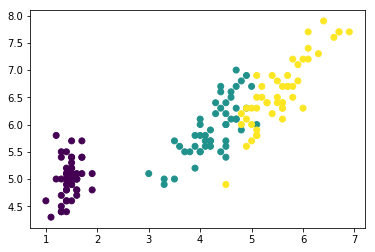

In [19]:
plt.scatter(iris.data[:,2], iris.data[:,0], c=iris.target)

### PCA 변환 후 분류
- 원점으로 돌아가 PCA 로 변환한 후 분류 알고리즘을 적용해 보겠습니다.
- PCA 도 정규화와 마찬가지로 속성을 변환하는 것이므로, 훈련세트에 대해 변환기준을 세워야 합니다.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

### 전처리
pca = PCA(2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### 분류 적용
model = SVC()
model.fit(X_train_pca, y_train)

### 평가
train_score = model.score(X_train_pca, y_train)
test_score = model.score(X_test_pca, y_test)

train_score, test_score

(0.9464285714285714, 0.9736842105263158)

- 위 결과에서 모든 속성을 고려했을 때 점수보다는 낮지만 PCA 변환 없이 속성 2개만 고려했을 때 보다는 점수가 높아졌음을 알 수 있습니다.
- PCA 변환의 장점은, 속성간의 상관관계를 좀 더 잘 이해할 수 있고 속성의 차원을 줄일 수 있으며 시각화가 가능하다는 점입니다.

### 정규화
- PCA 로 변환하기 전에, 속성들의 **정규화** 전처리가 꼭 필요합니다.
- 속성들의 스케일이 차이가 나면 올바른 주성분을 찾기가 어렵습니다.
- 위의 Iris 데이터의 경우 스케일이 크게 차이 나지 않기 때문에 그냥 적용한 것일 뿐입니다.

In [29]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train_norm = (X_train-X_mean)/X_std
X_test_norm = (X_test-X_mean)/X_std

pca = PCA(2)
X_train_norm_pca = pca.fit_transform(X_train_norm)
X_test_norm_pca = pca.transform(X_test_norm)

In [30]:
pca.components_

array([[ 0.52174935, -0.27109753,  0.58075976,  0.56302917],
       [-0.37175271, -0.92484565, -0.02310189, -0.07698534]])

In [32]:
model = SVC()
model.fit(X_train_norm_pca, y_train)

train_score = model.score(X_train_norm_pca, y_train)
test_score = model.score(X_test_norm_pca, y_test)

train_score, test_score

(0.9196428571428571, 0.9210526315789473)

- 예상과는 다르게 정규화를 적용한 이후에 성적이 오히려 더 나빠졌습니다.
- 첫번째 주성분을 보면 원본 속성들이 모두 고루 적용된 것을 볼 수 있습니다.
- 이러한 점이 특성 하나를 중시하는 것보다 좋지 못한 결과가 나오게 한 것으로 추측합니다.

### 속성 중요도 추출
- 속성이 많은 유방암 데이터에 적용해 보겠습니다.
- 유방암 데이터는 스케일 차이가 크기 때문에 정규화가 꼭 필요합니다.

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

cancer = load_breast_cancer()
X = cancer.data

# 정규화 적용!
X = (X - X.mean(axis=0)) / X.std(axis=0)

pca = PCA(2)
pca.fit(X)

pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

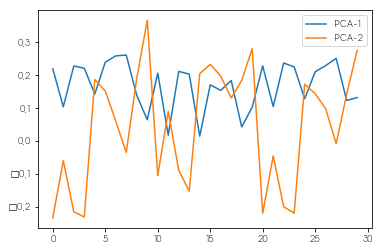

In [23]:
plt.plot(pca.components_.T)
plt.legend(['PCA-1', 'PCA-2'])

Text(0.5,1,'유방암 데이터 주성분 분석')

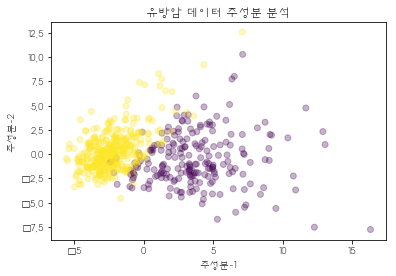

In [22]:
X_pca = pca.transform(X)

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/hynaml.ttf").get_name()
# h2gprm.ttf, uni_hsr.ttf, hynaml.ttf, nanumgothic.ttf
rc('font', family=font_name)

plt.scatter(X_pca[:,0], X_pca[:,1], c=cancer.target, alpha=0.3)
plt.xlabel('주성분-1')
plt.ylabel('주성분-2')
plt.title('유방암 데이터 주성분 분석')

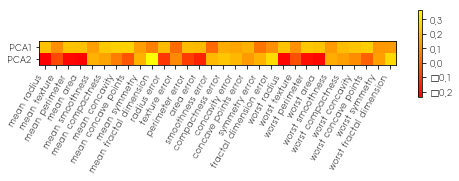

In [33]:
plt.figure(figsize=[8,8])
#plt.matshow(pca.components_, interpolation='none', cmap='autumn',
#            vmin=pca.components_.min(), vmax=pca.components_.max())
plt.imshow(pca.components_, interpolation='none', cmap='autumn',
            vmin=pca.components_.min(), vmax=pca.components_.max())
plt.yticks([0,1],['PCA1','PCA2'])
plt.colorbar(shrink=0.2)
plt.xticks(range(30), cancer.feature_names, rotation=60, ha='right')
print('')

- 첫번째 주성분은 모두 부호가 같습니다. 즉 서로 양의 상관관계를 가집니다.
- 첫번째 주성분의 특징을 상관관계도와 비교해 보면 좋겠습니다.

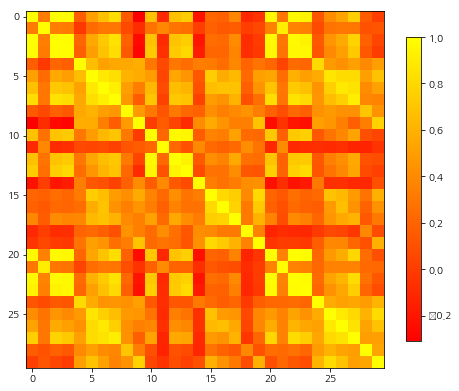

In [36]:
plt.figure(figsize=[8,8])
plt.imshow(np.corrcoef(cancer.data.T), interpolation='none', cmap='autumn')
plt.colorbar(shrink=0.7)

- 첫번째 주성분은 원본 속성의 0번 속성과, 두번째 주성분은 원본 속성의 9번 또는 29번 속성과 비슷합니다. 

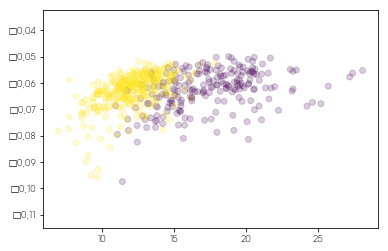

In [34]:
plt.scatter(cancer.data[:,0], -cancer.data[:,9], c=cancer.target, alpha=0.2)